# Tensorflow Classification Problem

Classification problem in Deep Learning Section

We will deal with overfitting through early Stopping Callbacks and Dropout Layers.

Section 25. Class 141 is starting point

Early Stopping can automatically stop training based on a loss condition on the validation data passed during the model.fit() call

Dropout layers 

Dropout layers will 'drop' a user defined percentage of neuron units in the previous layer every batch

Certain neurons won't have weights and biases affected during a batch.. instead they are just turned off 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()
# any null values?
# none here, all same number of lines

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# describe it to explore statistical distribution of data
# transpose it so easier to read, flips x and y axis

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

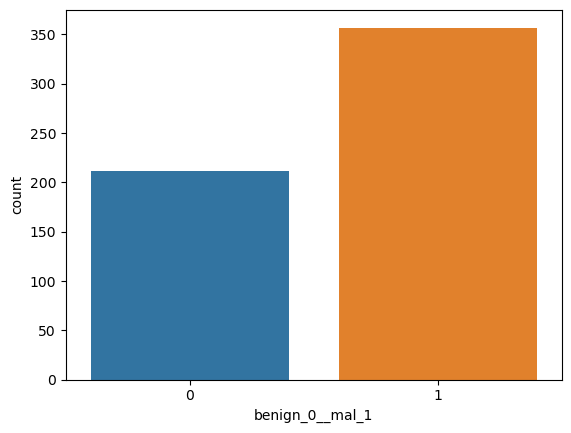

In [9]:
# label column
# count plot to see number of instances per label
# to see if it is well balanced problem or not

sns.countplot(x='benign_0__mal_1',data=df)

# its relatively well balanced below

In [11]:
# check out coorlation between features themselves
# sort values added on end to sort

# can add .plot(kind='bar') for barplot

df.corr()['benign_0__mal_1'].sort_values() #.plot(kind='bar')

# since the last one is 1 to 1 coorlated cause its the same column, do this to grab everything but last one

###  df.corr()['benign_0__mal_1'][:-1].sort_values() #.plot(kind='bar')

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<Axes: >

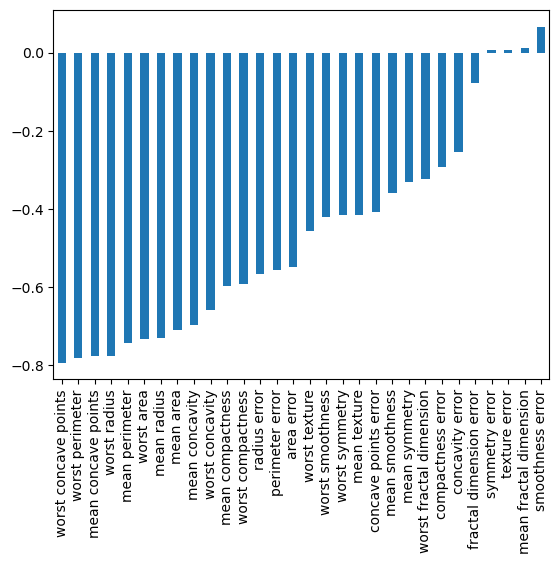

In [12]:
# since the last one is 1 to 1 coorlated cause its the same column, do this to grab everything but last one

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

# high negative coorlation shown below

In [13]:
### train test split
# we create it below
# dot values so its a numpy array

X = df.drop('benign_0__mal_1',axis=1).values

y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# split 25% of data because not as much data available

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
# scale the data
# import in min max scaler

from sklearn.preprocessing import MinMaxScaler



In [19]:
# create instance of the scaler

scaler = MinMaxScaler()

In [20]:
# fit transform our training data
X_train = scaler.fit_transform(X_train)


# transform our testing data(don't want to fit to test data, only fit to training data to prevent leakage)
X_test = scaler.transform(X_test)

In [ ]:
### Dealing with overfitting and Evaluation

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense,Dropout

In [24]:
# create a Sequential model

model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# sigmoid because this is a binary classifcation problem
# malignant or benign tumor?
model.add(Dense(1,activation='sigmoid'))


# compile it 
# loss call is binary crossentropy, and optimizer = 'adam'
model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [26]:
# train the model here
# pass in validation data of X_test and y_test
# 600 epochs is too many but lets overfit it here

model.fit(x=X_train,y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 0.6782 - val_loss: 0.6592
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6340 - val_loss: 0.6147
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5853 - val_loss: 0.5624
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5292 - val_loss: 0.5011
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4682 - val_loss: 0.4377
Epoch 6/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4071 - val_loss: 0.3784
Epoch 7/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3529 - val_loss: 0.3270
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3084 - val_loss: 0.2817
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2757 - val_loss: 0.2549
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.2500 - val_loss: 0.2252
Epoch

Epoch 83/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0507 - val_loss: 0.1108
Epoch 84/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0508 - val_loss: 0.1144
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0545 - val_loss: 0.1100
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0555 - val_loss: 0.1156
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0505 - val_loss: 0.1137
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0523 - val_loss: 0.1213
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0562 - val_loss: 0.1116
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0591 - val_loss: 0.1213
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0538 - val_loss: 0.1102
Epoch 92/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0550 - val_loss: 0.114

14/14 [==============================] - 0s 8ms/step - loss: 0.0466 - val_loss: 0.1226
Epoch 165/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0478 - val_loss: 0.1431
Epoch 166/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0435 - val_loss: 0.1295
Epoch 167/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0424 - val_loss: 0.1333
Epoch 168/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0436 - val_loss: 0.1373
Epoch 169/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0449 - val_loss: 0.1241
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0520 - val_loss: 0.1402
Epoch 171/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0415 - val_loss: 0.1288
Epoch 172/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0410 - val_loss: 0.1403
Epoch 173/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0435 - val_loss: 0.1454
Epo

14/14 [==============================] - 0s 4ms/step - loss: 0.0372 - val_loss: 0.1462
Epoch 246/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0353 - val_loss: 0.1537
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0357 - val_loss: 0.1655
Epoch 248/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0367 - val_loss: 0.1557
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0354 - val_loss: 0.1486
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0355 - val_loss: 0.1537
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0366 - val_loss: 0.1638
Epoch 252/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.1501
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0343 - val_loss: 0.1640
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0351 - val_loss: 0.1485
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0306 - val_loss: 0.1654
Epoch 327/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0300 - val_loss: 0.1691
Epoch 328/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0313 - val_loss: 0.1773
Epoch 329/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0294 - val_loss: 0.1679
Epoch 330/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0314 - val_loss: 0.1869
Epoch 331/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0327 - val_loss: 0.1602
Epoch 332/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0352 - val_loss: 0.1739
Epoch 333/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0323 - val_loss: 0.1652
Epoch 334/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0319 - val_loss: 0.2153
Epoch 335/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0367 - val_loss: 0.1474
Epo

14/14 [==============================] - 0s 8ms/step - loss: 0.0287 - val_loss: 0.1774
Epoch 408/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0260 - val_loss: 0.1731
Epoch 409/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0312 - val_loss: 0.1668
Epoch 410/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0449 - val_loss: 0.2193
Epoch 411/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0332 - val_loss: 0.1731
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.1692
Epoch 413/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0329 - val_loss: 0.1947
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0260 - val_loss: 0.1766
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0265 - val_loss: 0.1809
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0250 - val_loss: 0.1728
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0219 - val_loss: 0.2038
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.1747
Epoch 490/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0289 - val_loss: 0.2311
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0310 - val_loss: 0.1776
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0230 - val_loss: 0.1837
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0254 - val_loss: 0.2227
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0254 - val_loss: 0.1864
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.1899
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.1928
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0220 - val_loss: 0.1807
Epoc

14/14 [==============================] - 0s 10ms/step - loss: 0.0253 - val_loss: 0.2250
Epoch 570/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0291 - val_loss: 0.1646
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0307 - val_loss: 0.2043
Epoch 572/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0170 - val_loss: 0.1646
Epoch 573/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0195 - val_loss: 0.2303
Epoch 574/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0248 - val_loss: 0.1653
Epoch 575/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0231 - val_loss: 0.2362
Epoch 576/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0201 - val_loss: 0.1736
Epoch 577/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0190 - val_loss: 0.1898
Epoch 578/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0181 - val_loss: 0.1911


In [27]:
# plot the loss
## we passed in validation data to our model, so we can look at training loss and validation loss 
# pass it into a pandas dataframe
# create variable called losses

losses = pd.DataFrame(model.history.history)

losses



,loss,val_loss
0,0.678199,0.659166
1,0.633989,0.614719
2,0.585280,0.562409
3,0.529170,0.501090
4,0.468199,0.437716
...,...,...
595,0.016785,0.188974
596,0.016934,0.187040
597,0.016825,0.197912
598,0.016901,0.185018


<Axes: >

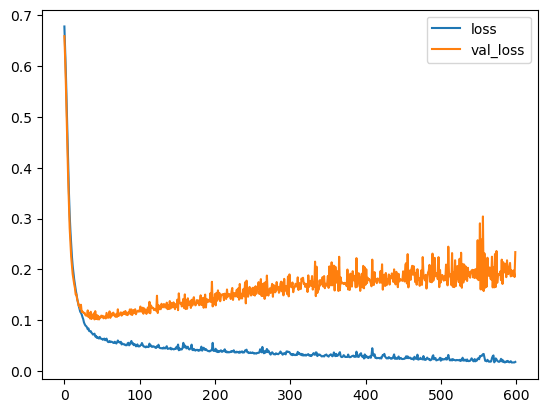

In [28]:
# plot out losses

losses.plot()

# example of overfitting
# begining validation and training loss was going down,
# at vertain point in time, training loss(blue) is going down and validation loss (orange) is increasing
# we are training for too many epochs
# tensflow.keras callbacks can stop trainig before it gets out of hand

In [ ]:
# run model again, run it fresh below..
# we don't want to keep training on same model

In [36]:
# create a Sequential model

model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# sigmoid because this is a binary classifcation problem
# malignant or benign tumor?
model.add(Dense(1,activation='sigmoid'))


# compile it 
# loss call is binary crossentropy, and optimizer = 'adam'
model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [37]:
# use callbacks to stop model early

from tensorflow.keras.callbacks import EarlyStopping

# help(EarlyStopping)  for additonal info on it

In [38]:
# import callbacks from tensorflow (done above)

# early stopping has 2 steps
# step 1 is define the variable
# define the variable, EarlyStoppning call, monitor='validation loss', mode is'mximize or minmize what we are watching for 'like loss'
# mode is what we are tracking, we are tracking validation loss and we are trying to minmize it
# pateince is wait 25 more epochs after detecting stopping point
# if the metrics we were measuring was accuracy we would want maximize

# verbose =1 is a report back
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [39]:
### redefine the model again

# use callbacks now
# pass in list of early_stop from above

# it will stop when necessary

model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 26ms/step - loss: 0.6825 - val_loss: 0.6625
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6493 - val_loss: 0.6286
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6124 - val_loss: 0.5914
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5733 - val_loss: 0.5485
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5289 - val_loss: 0.5026
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4829 - val_loss: 0.4539
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4343 - val_loss: 0.4043
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3873 - val_loss: 0.3551
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3460 - val_loss: 0.3135
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3088 - val_loss: 0.2800
Epoch 11

<Axes: >

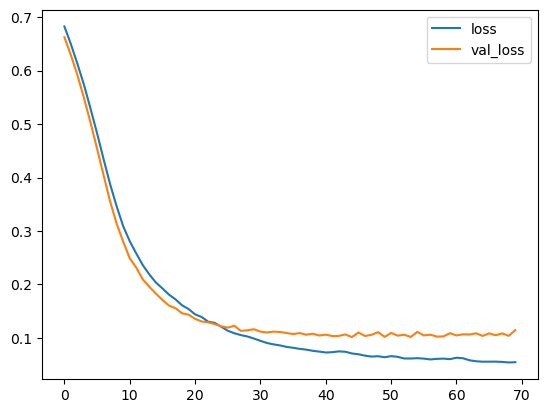

In [40]:
# check out model loss

model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

In [ ]:
# in the above we want to prevent validation loss to increase, early stop will get triggered

In [ ]:
## The third thing we can do to prevent overfitting, is add in drop out layers
# will randomly turn off a percentage of neurons 

In [41]:
from tensorflow.keras.layers import Dropout

In [42]:
## rerun model so we don't retrain the same model
model = Sequential()

model.add(Dense(30,activation='relu'))
# add dropout after dense layer
# rate is % of neurons you are turing neurons off (common is 0.2 - 0.5)/half of neurons in this layer of 30 is turned off. weights and biases won't be updated
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
# add dropout here too after dense layer, half of 15 random neurons turned off (50% chance) 
model.add(Dropout(0.5))

# sigmoid because this is a binary classifcation problem
# malignant or benign tumor?
model.add(Dense(1,activation='sigmoid'))


# compile it 
# loss call is binary crossentropy, and optimizer = 'adam'
model.compile(loss='binary_crossentropy',optimizer = 'adam')

In [43]:
# model with early stopping and dropout layers from above

model.fit(x=X_train,y=y_train, epochs=600, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 22ms/step - loss: 0.7321 - val_loss: 0.6914
Epoch 2/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6853 - val_loss: 0.6659
Epoch 3/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6593 - val_loss: 0.6442
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6469 - val_loss: 0.6220
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6281 - val_loss: 0.5995
Epoch 6/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6010 - val_loss: 0.5746
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5980 - val_loss: 0.5507
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5818 - val_loss: 0.5283
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5317 - val_loss: 0.4984
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5031 - val_loss: 0.4644
Epoc

Epoch 83/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1265 - val_loss: 0.1027
Epoch 84/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1167 - val_loss: 0.0958
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1287 - val_loss: 0.1163
Epoch 86/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1279 - val_loss: 0.0966
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1228 - val_loss: 0.1021
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1208 - val_loss: 0.1249
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1130 - val_loss: 0.0927
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1116 - val_loss: 0.1015
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1035 - val_loss: 0.1024
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1212 - val_loss: 0.0964


In [44]:
# analyze loss

model_loss = pd.DataFrame(model.history.history)

<Axes: >

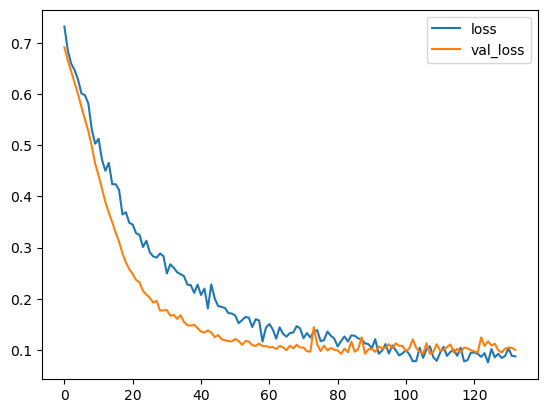

In [45]:
# plot it
# great behavior
# training loss and validation loss will be quickly going down and flattening at same rate

model_loss.plot()

In [46]:
# Lets do full evaluation on classes
# this was a classifcation task, 0 or 1
# with keras, instead of model.predict we do model.predict_classes


# this didnt work so go to next cell below
model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [47]:
predict = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [48]:
predict

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [49]:
# metrics
# two things we import for classification problem
##   classifcation report and confusion matrix

from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [52]:
print(confusion_matrix(y_test,predict))
# set was balanced in beginning

# only misclassifie 1 set

[[54  1]
 [ 3 85]]
